# DEEP FACE

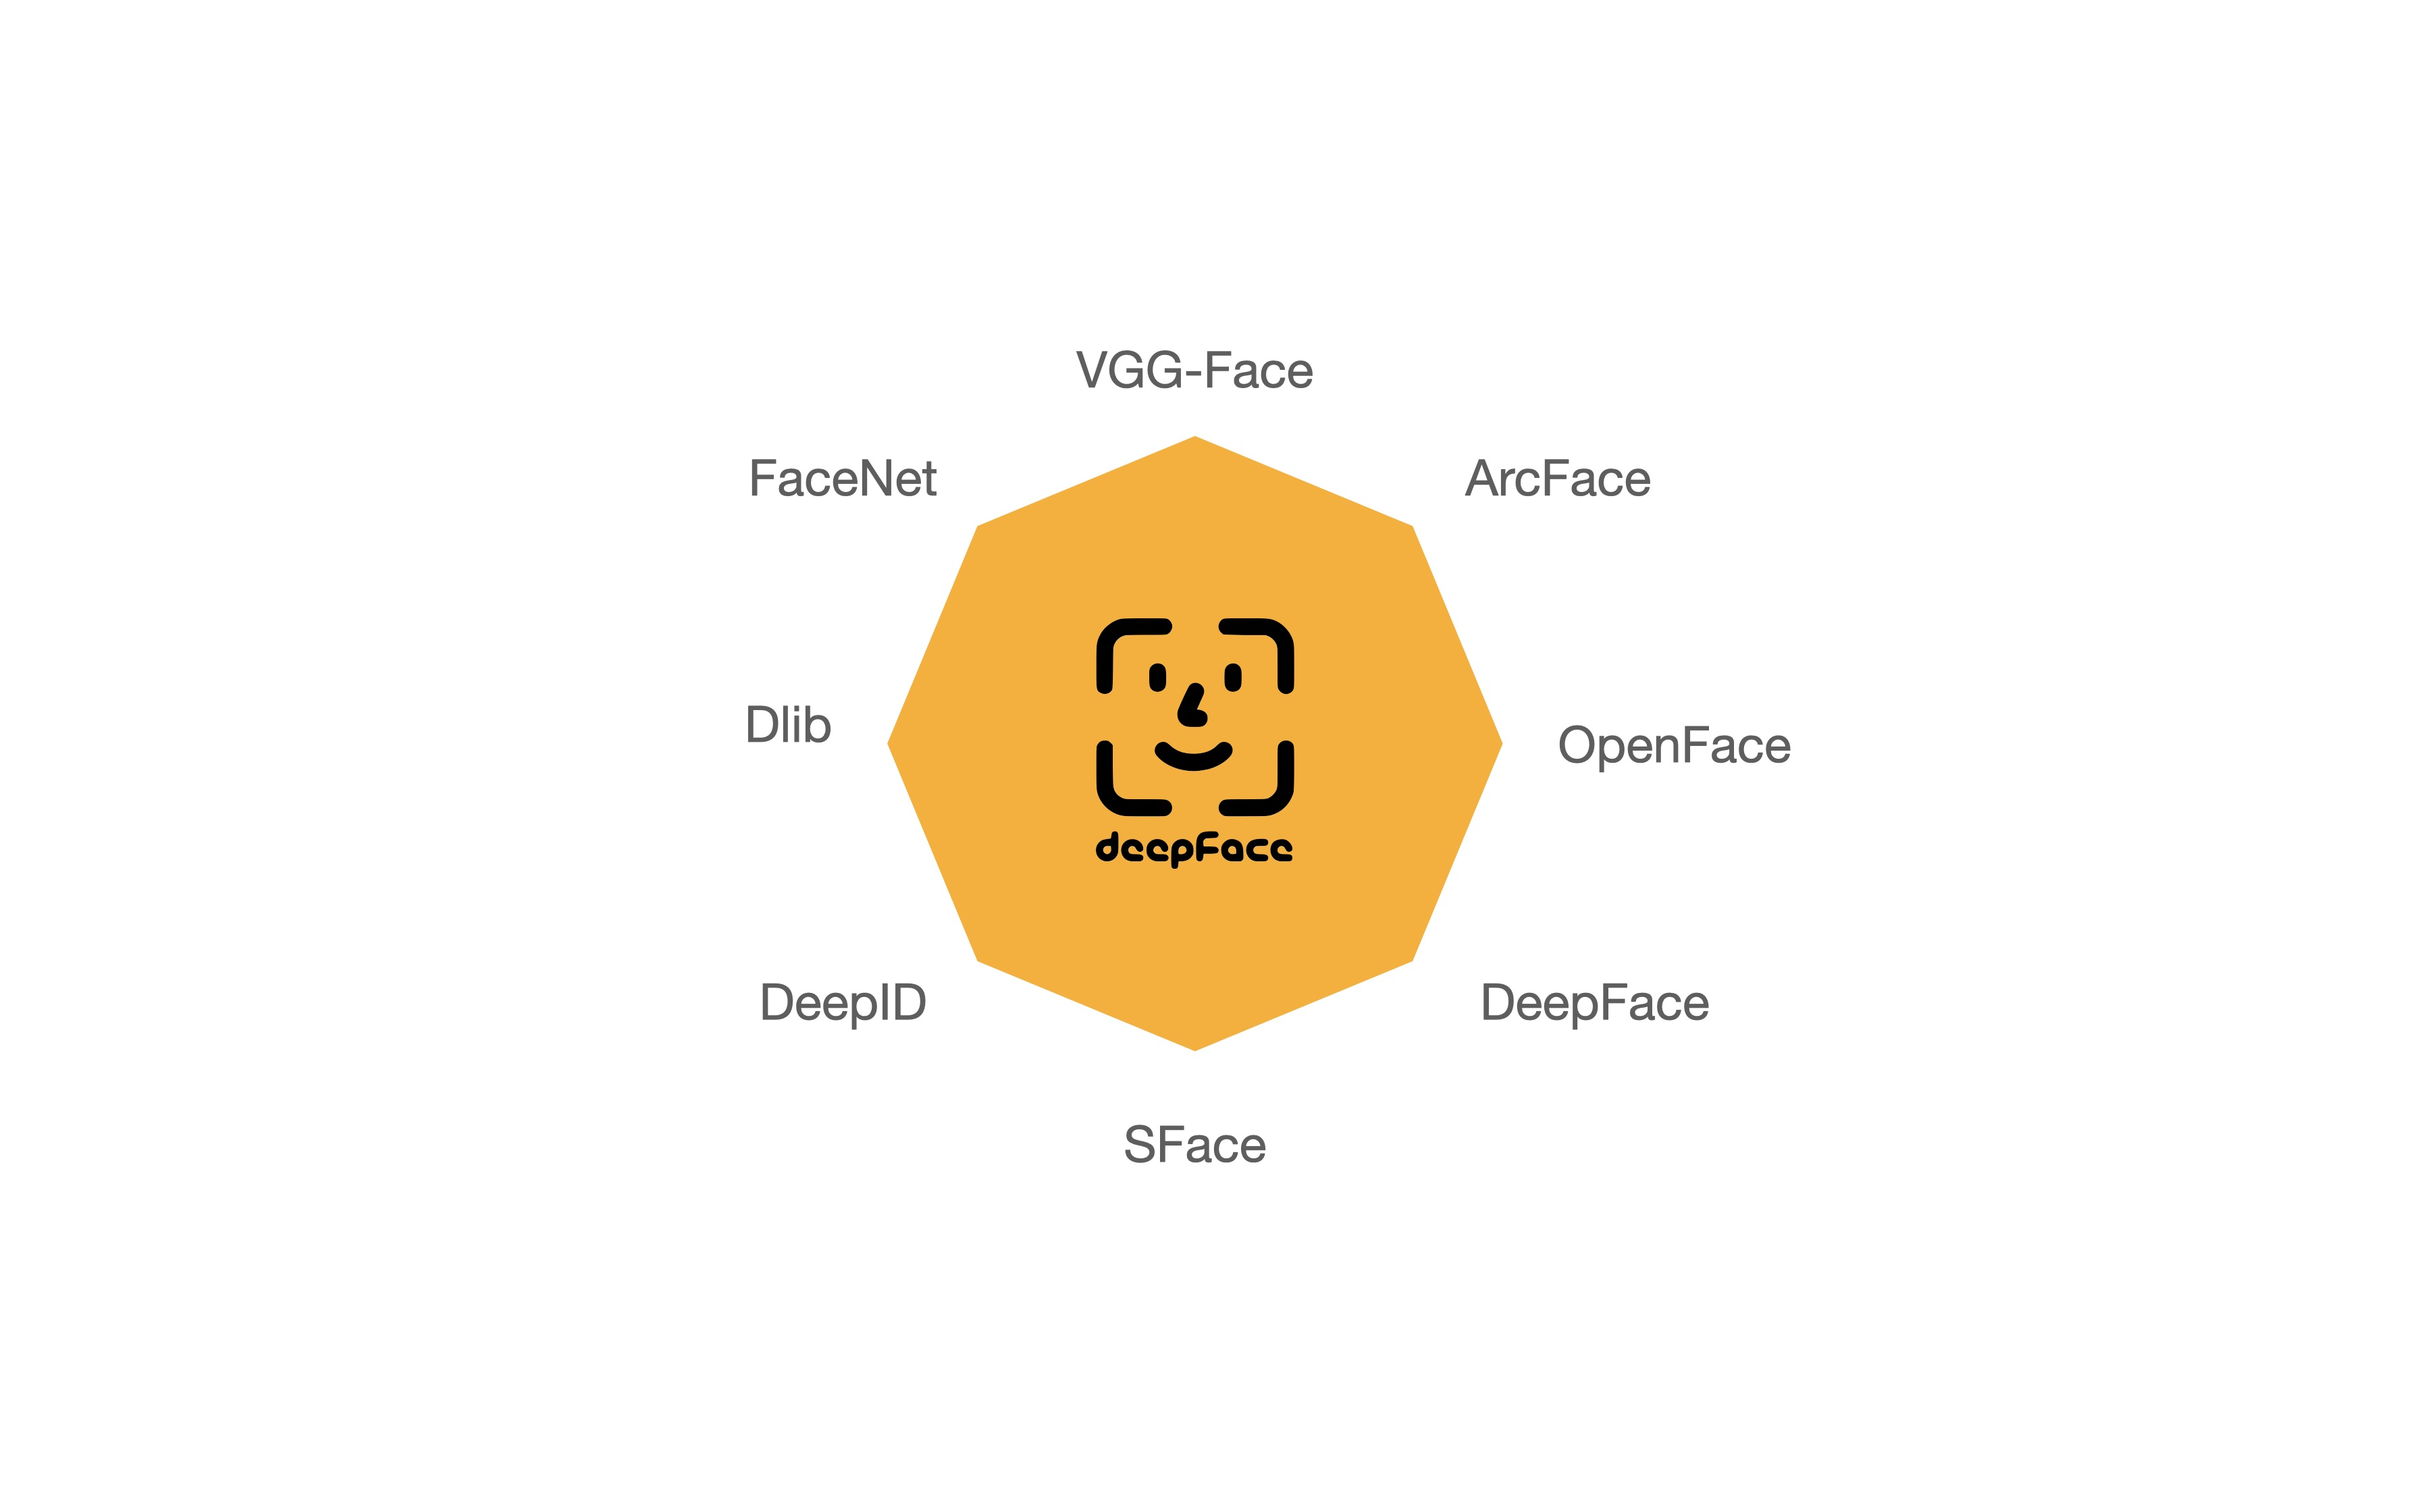

In [115]:
from deepface import DeepFace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

### Face Verification

In [79]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace",  
  "SFace",
  "GhostFaceNet",
] 

backends = [
  'opencv', 
  'ssd',  
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

success = {}

for i in range (len(models)):
    for j in range(len(backends)):
        result = DeepFace.verify(img1_path = "aniston2.jpg", img2_path = "aniston3.jpg",
                                model_name = models[i],
                                detector_backend = backends[j])
        print(models[i])
        print(backends[j])
        print(result["verified"])
        
        success[(models[i], backends[j])] = result["threshold"] / result["distance"]
        

VGG-Face
opencv
True
VGG-Face
ssd
True
1/1 [==============================] - 0s 34ms/step
VGG-Face
mtcnn
True
VGG-Face
fastmtcnn
True
VGG-Face
retinaface
True
VGG-Face
mediapipe
True
VGG-Face
yolov8
True
VGG-Face
yunet
True
VGG-Face
centerface
True
Facenet
opencv
True
Facenet
ssd
True
1/1 [==============================] - 0s 19ms/step
Facenet
mtcnn
True
Facenet
fastmtcnn
True
Facenet
retinaface
True
Facenet
mediapipe
False
Facenet
yolov8
True
Facenet
yunet
True
Facenet
centerface
True
Facenet512
opencv
False
Facenet512
ssd
False
1/1 [==============================] - 0s 19ms/step
Facenet512
mtcnn
False
Facenet512
fastmtcnn
False
Facenet512
retinaface
False
Facenet512
mediapipe
False
Facenet512
yolov8
False
Facenet512
yunet
False
Facenet512
centerface
False
OpenFace
opencv
False
OpenFace
ssd
False
1/1 [==============================] - 0s 55ms/step
OpenFace
mtcnn
False
OpenFace
fastmtcnn
False
OpenFace
retinaface
False
OpenFace
mediapipe
False
OpenFace
yolov8
False
OpenFace
yunet
Fals

1/1 [==============================] - 0s 31ms/step
DeepID
mtcnn
False
DeepID
fastmtcnn
True
DeepID
retinaface
False
DeepID
mediapipe
False
DeepID
yolov8
True
DeepID
yunet
True
DeepID
centerface
False
ArcFace
opencv
True
ArcFace
ssd
True
1/1 [==============================] - 0s 25ms/step
ArcFace
mtcnn
True
ArcFace
fastmtcnn
True
ArcFace
retinaface
True
ArcFace
mediapipe
True
ArcFace
yolov8
True
ArcFace
yunet
True
ArcFace
centerface
True
SFace
opencv
True
SFace
ssd
True
1/1 [==============================] - 0s 31ms/step
SFace
mtcnn
False
SFace
fastmtcnn
True
SFace
retinaface
False
SFace
mediapipe
True
SFace
yolov8
False
SFace
yunet
True
SFace
centerface
True
GhostFaceNet
opencv
True
GhostFaceNet
ssd
True
1/1 [==============================] - 0s 31ms/step
GhostFaceNet
mtcnn
False
GhostFaceNet
fastmtcnn
True
GhostFaceNet
retinaface
False
GhostFaceNet
mediapipe
True
GhostFaceNet
yolov8
False
GhostFaceNet
yunet
True
GhostFaceNet
centerface
True


In [80]:
df = pd.DataFrame(list(success.items()), columns = ["Model and Backend","Success Ratio"])

In [81]:
df = df.sort_values(by='Success Ratio', ascending=False)

In [82]:
df.head(20)

,Model and Backend,Success Ratio
12,"(Facenet, fastmtcnn)",1.535523
68,"(SFace, mediapipe)",1.522371
4,"(VGG-Face, retinaface)",1.494217
7,"(VGG-Face, yunet)",1.490482
3,"(VGG-Face, fastmtcnn)",1.459178
77,"(GhostFaceNet, mediapipe)",1.458559
2,"(VGG-Face, mtcnn)",1.455872
13,"(Facenet, retinaface)",1.443316
11,"(Facenet, mtcnn)",1.426720
1,"(VGG-Face, ssd)",1.413106


In [83]:
df.tail(10)

,Model and Backend,Success Ratio
18,"(Facenet512, opencv)",0.628136
28,"(OpenFace, ssd)",0.550926
34,"(OpenFace, yunet)",0.447598
45,"(DeepID, opencv)",0.438818
31,"(OpenFace, retinaface)",0.429362
29,"(OpenFace, mtcnn)",0.422656
30,"(OpenFace, fastmtcnn)",0.409151
41,"(DeepFace, mediapipe)",0.408101
33,"(OpenFace, yolov8)",0.392484
27,"(OpenFace, opencv)",0.242643


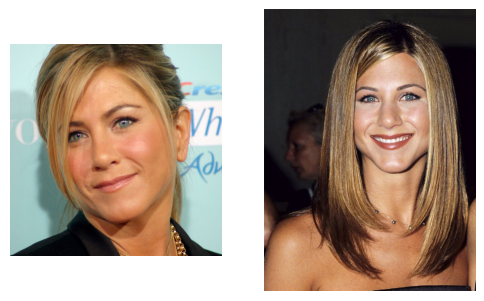

In [96]:
 f = plt.figure(figsize=(6,8))

f.add_subplot(1,2,1)
plt.imshow(Image.open("aniston2.jpg"))
plt.axis("off")

f.add_subplot(1,2,2)
plt.imshow(Image.open("aniston3.jpg"))
plt.axis("off")

plt.show()

### Face Recognition

In [119]:
db_images = os.listdir("db")
db_images

['aniston1.jpg', 'aniston3.jpg', 'lawrence1.jpg']

In [120]:
dfs = DeepFace.find(img_path = "aniston2.jpg", 
        db_path = "db", 
)

24-04-27 12:46:01 - Found 3 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|███████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.00s/it]


24-04-27 12:46:04 - There are now 4 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-04-27 12:46:04 - Searching aniston2.jpg in 4 length datastore
24-04-27 12:46:05 - find function duration 3.6003456115722656 seconds


In [121]:
dfs[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,db\aniston3.jpg,1c424642bdb9529daf19f9a615ea74092c6868cf,246,160,353,353,55,74,447,447,0.68,0.513610
1,db\aniston1.jpg,f6a8f2942a04c15d370a38e1eb090fa5f020cbd7,586,184,315,315,55,74,447,447,0.68,0.672696


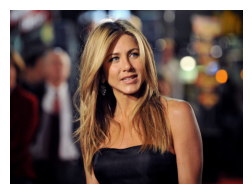

aniston1.jpg


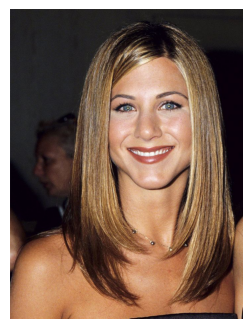

aniston3.jpg


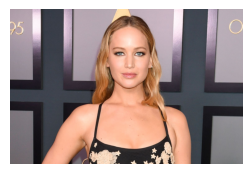

lawrence1.jpg


In [130]:
#Images in db folder
for image in db_images:
    plt.figure(figsize=(3,5))
    plt.imshow(Image.open(f"db/{image}"))
    plt.axis("off")
    plt.show()
    print(image)

### Face Analysis

In [86]:
objs = DeepFace.analyze(img_path = "aniston2.jpg", 
        actions = ['age', 'gender', 'race', 'emotion']
)

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.94it/s]


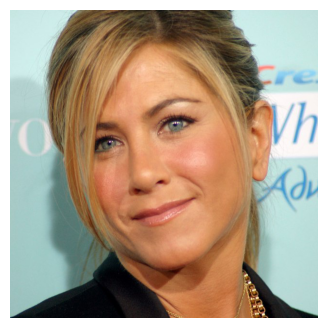

Age :31 
Gender :Woman 
Race :white 
Emotion :neutral 


In [98]:
plt.figure(figsize=(4,4))
plt.imshow(Image.open("aniston2.jpg"))
plt.axis("off")
plt.show()

print(f"Age :{objs[0]['age']} ")
print(f"Gender :{objs[0]['dominant_gender']} ")
print(f"Race :{objs[0]['dominant_race']} ")
print(f"Emotion :{objs[0]['dominant_emotion']} ")